# Implementasi Extreme Learning Machine Untuk Memprediksi Curah Hujan Bulanan Dalam Penentuan Jadwal Tanam Padi

## Bussiness Understanding

Perubahan iklim dan pola curah hujan yang tidak menentu menjadi tantangan serius bagi pertanian, terutama dalam menentukan waktu yang tepat untuk tanam padi. Penelitian ini bertujuan untuk memodelkan curah hujan sebagai penentu jadwal tanam padi di Kabupaten Bangkalan, Madura. Pulau Madura, yang merupakan pulau terbesar di Jawa Timur, memiliki lahan kering yang luas, dengan total 77.999,64 ha di Kabupaten Bangkalan. Pertanian lahan kering sangat bergantung pada curah hujan, sehingga memerlukan perencanaan tanam yang tepat untuk efisiensi penggunaan air. Metode Extreme Learning Machine (ELM) dipilih dalam penelitian ini karena dipilih karena kecepatan pelatihan yang tinggi dan kemampuan generalisasi yang baik. Data yang diolah terdiri dari 1.643 data curah hujan harian yang diperoleh dari situs data online [BMKG Stasiun Meteorologi Perak I Surabaya](https://www.bmkg.go.id), dengan rentang waktu dari Januari 2020 hingga Juni 2024. 

## Data Understanding

Adapun hal - hal yang perlu dilakukan untuk memahami dataset ini, yakni
1. Mendeskripsikan setiap fitur pada data
2. Mengidentifikasi missing values setiap fitur atau kolom
3. Eksplorasi data (grafikan fitur)

In [1]:
import pandas as pd

data = pd.read_excel('data.xlsx', parse_dates=['Tanggal'])
data

,Tanggal,CH
0,2020-01-01,8888.0
1,2020-01-02,1.3
2,2020-01-03,0.0
3,2020-01-04,1.8
4,2020-01-05,1.3
...,...,...
1638,2024-06-26,NaN
1639,2024-06-27,0.0
1640,2024-06-28,0.0
1641,2024-06-29,1.4


In [2]:
print("Banyak data : ", data.shape[0], "data")

Banyak data :  1643 data


### Deskripsi Data

1. `Tanggal` : tanggal turun hujan
2. `CH` : singkatan dari Curah Hujan dengan satuan mm (mili meter)

### Identifikasi Missing Value

Missing Value adalah hilangnya satu atau beberapa data dalam suatu atribut. Berikut penyebab umum dari adanya *missing value*. 
1. Kesalahan manusia saat memasukkan data, contohnya penyalinan data yang tidak lengkap atau salah pengetikan
2. Terdapat beberapa pertanyaan tidak diisi oleh responden
3. Ketika data dihapus dan tidak diunduh dengan benar dari sumbernya
4. serta Tidak semua atribut sesuai dengan semua narasumber, contohnya atribut pendapat yang tidak relevan untuk siswa yang tidak bekerja

In [3]:
# Menghitung apakah ada nilai yang hilang dalam setiap kolom
missing_values = data.isna().any()

# Menampilkan hasil
print("Apakah ada nilai yang hilang dalam setiap kolom:")
print(missing_values)

Apakah ada nilai yang hilang dalam setiap kolom:
Tanggal    False
CH          True
dtype: bool


### Identifikasi Hujan Tak Diukur

In [4]:
jumlah_8888 = (data['CH'] == 8888).sum()
print("Banyak data 8888 / tidak diukur : ", jumlah_8888 )

Banyak data 8888 / tidak diukur :  100


## Data Preparation

Setelah memahami data, akan dilakukan tahap preprocessing untuk menangani masalah pada data yang sudah didefinisikan pada data understanding, yakni.
1. Mengganti missing value dengan nilai 0
2. Mengganti data tidak terukur / 8888 dengan nilai 0

Setelah data siap, akan dilakukan :
1. Normalisasi data
2. Lagged data

### Mengganti Missing Value

In [5]:
data['CH'] = data['CH'].fillna(0)

# Menampilkan hasil
missing_values = data.isna().any()
print("Apakah ada nilai yang hilang dalam setiap kolom:")
print(missing_values)

Apakah ada nilai yang hilang dalam setiap kolom:
Tanggal    False
CH         False
dtype: bool


### Mengganti Data Tidak Terukur

In [6]:
data['CH'] = data['CH'].replace(8888, 0)


jumlah_8888 = (data['CH'] == 8888).sum()
print("Banyak data 8888 / tidak diukur : ", jumlah_8888 )

Banyak data 8888 / tidak diukur :  0


### Normalisasi Data

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['CH']])

print("Data yang telah dinormalisasi : ")
print(data_scaled)

Data yang telah dinormalisasi : 
[[0.        ]
 [0.00874832]
 [0.        ]
 ...
 [0.        ]
 [0.00942127]
 [0.        ]]


### Lagged

In [8]:
import numpy as np

def create_dataset(data, lag=1):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:(i + lag), 0])
        y.append(data[i + lag, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(data_scaled, 7)

In [9]:
fitur = pd.DataFrame(X, columns=[f'Lag_{i+1}' for i in range(X.shape[1])])
print("Hasil Lagged Data : ")
fitur

Hasil Lagged Data : 


,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7
0,0.000000,0.008748,0.000000,0.012113,0.008748,0.110363,0.263795
1,0.008748,0.000000,0.012113,0.008748,0.110363,0.263795,0.003365
2,0.000000,0.012113,0.008748,0.110363,0.263795,0.003365,0.013459
3,0.012113,0.008748,0.110363,0.263795,0.003365,0.013459,0.355316
4,0.008748,0.110363,0.263795,0.003365,0.013459,0.355316,0.021534
...,...,...,...,...,...,...,...
1631,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
target = pd.DataFrame(y, columns=['Target'])
print("\n Target : ")
target


 Target : 


,Target
0,0.003365
1,0.013459
2,0.355316
3,0.021534
4,0.040377
...,...
1631,0.000000
1632,0.000000
1633,0.000000
1634,0.009421


In [11]:
# Menggabungkan df_X dan df_y
df_combined = pd.concat([fitur, target], axis=1)

# Menyimpan gabungan ke file Excel
output_file = 'dataset.xlsx'
df_combined.to_excel(output_file, index=False)

# Menampilkan dataset
df_combined

,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Target
0,0.000000,0.008748,0.000000,0.012113,0.008748,0.110363,0.263795,0.003365
1,0.008748,0.000000,0.012113,0.008748,0.110363,0.263795,0.003365,0.013459
2,0.000000,0.012113,0.008748,0.110363,0.263795,0.003365,0.013459,0.355316
3,0.012113,0.008748,0.110363,0.263795,0.003365,0.013459,0.355316,0.021534
4,0.008748,0.110363,0.263795,0.003365,0.013459,0.355316,0.021534,0.040377
...,...,...,...,...,...,...,...,...
1631,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009421


## Modelling

In [12]:
# Fungsi untuk menghitung MAPE dengan aman (menghindari pembagian dengan nol)
def safe_mape(y_true, y_pred):
    mask = y_true != 0  # Hanya menghitung MAPE ketika nilai y_true tidak nol
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]))  # Kembali ke format desimal

In [13]:
from hpelm import ELM
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fungsi untuk pengujian berbagai rasio latih dan uji serta hidden neuron
def run_experiment(X, y, hidden_neurons_range, train_test_ratios):
    results = []
    for ratio in train_test_ratios:
        train_size = int(len(X) * ratio)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]
        
        for hidden_neurons in hidden_neurons_range:
            # 4. Membuat Model ELM
            elm = ELM(X_train.shape[1], 1)
            elm.add_neurons(hidden_neurons, 'sigm')
            elm.train(X_train, y_train, 'r')

            # 5. Prediksi
            y_pred_test = elm.predict(X_test)
            
            # 6. Evaluasi dengan MAPE, MAE, dan MSE
            error_mape = safe_mape(y_test, y_pred_test)  # Menggunakan safe_mape
            error_mae = mean_absolute_error(y_test, y_pred_test)
            error_mse = mean_squared_error(y_test, y_pred_test)
            
            # Simpan hasilnya
            results.append({
                'Train/Test Ratio': ratio,
                'Hidden Neurons': hidden_neurons,
                'MAPE': error_mape,  # Simpan sebagai desimal
                'MAE': error_mae,
                'MSE': error_mse
            })
    
    return pd.DataFrame(results)

In [14]:
# Skenario Pengujian
hidden_neurons_range = range(1, 11)  # Hidden neuron dari 1 hingga 10
train_test_ratios = [0.7, 0.8, 0.9]  # Rasio latih dan uji 70:30, 80:20, 90:10

# Menjalankan eksperimen
results = run_experiment(X, y, hidden_neurons_range, train_test_ratios)

# Menyimpan hasil pengujian ke dalam file Excel
output_excel = "hasil evaluasi.xlsx"
results.to_excel(output_excel, index=False)

print(f"Hasil pengujian telah disimpan ke {output_excel}")

# 9. Mencari parameter terbaik (berdasarkan MAPE terkecil)
best_result = results.loc[results['MAPE'].idxmin()]  # Ambil yang terendah

# Menampilkan parameter terbaik
print(f"Parameter terbaik ditemukan pada:")
print(f"Train/Test Ratio: {best_result['Train/Test Ratio']}")
print(f"Hidden Neurons: {best_result['Hidden Neurons']}")
print(f"MAPE: {best_result['MAPE']}")  # Tampilkan MAPE sebagai desimal
print(f"MAE: {best_result['MAE']}")
print(f"MSE: {best_result['MSE']}")

Hasil pengujian telah disimpan ke hasil evaluasi.xlsx
Parameter terbaik ditemukan pada:
Train/Test Ratio: 0.9
Hidden Neurons: 1.0
MAPE: 2.4890502648066573
MAE: 0.0448447709219787
MSE: 0.008601053693751005


In [15]:
import pickle

# Menyimpan model ke file pickle
with open("model_terbaik.pkl", "wb") as file:
    pickle.dump(best_result, file)

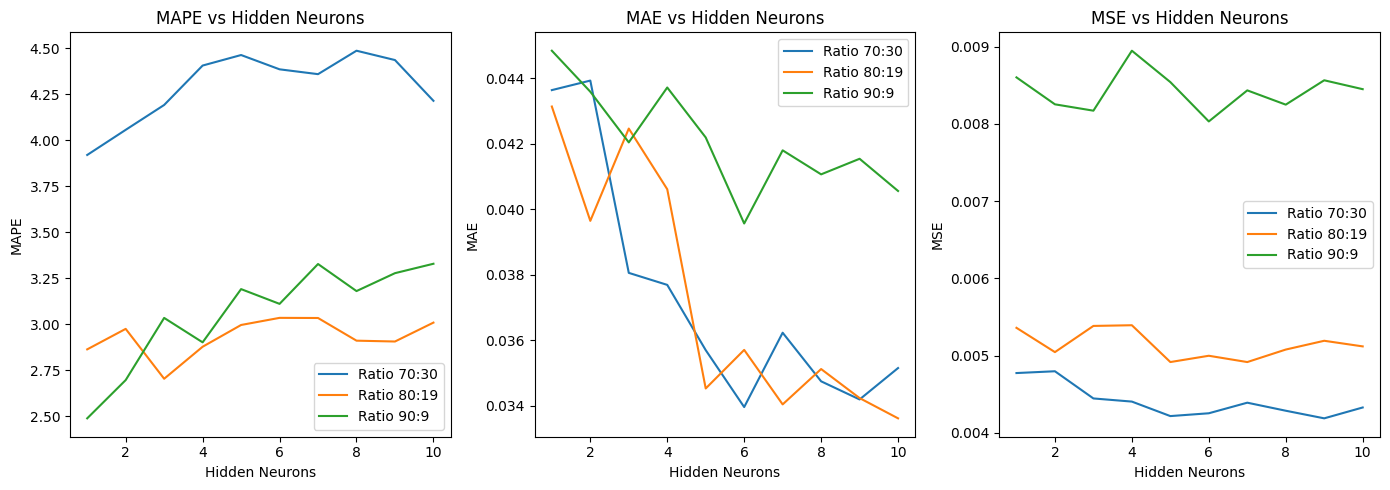

In [16]:
import matplotlib.pyplot as plt

#Visualisasi hasil MAPE, MAE, dan MSE
plt.figure(figsize=(14, 5))

# Plot MAPE
plt.subplot(1, 3, 1)
for ratio in train_test_ratios:
    subset = results[results['Train/Test Ratio'] == ratio]
    plt.plot(subset['Hidden Neurons'], subset['MAPE'], label=f"Ratio {int(ratio*100)}:{int((1-ratio)*100)}")
plt.xlabel('Hidden Neurons')
plt.ylabel('MAPE')
plt.title('MAPE vs Hidden Neurons')
plt.legend()

# Plot MAE
plt.subplot(1, 3, 2)
for ratio in train_test_ratios:
    subset = results[results['Train/Test Ratio'] == ratio]
    plt.plot(subset['Hidden Neurons'], subset['MAE'], label=f"Ratio {int(ratio*100)}:{int((1-ratio)*100)}")
plt.xlabel('Hidden Neurons')
plt.ylabel('MAE')
plt.title('MAE vs Hidden Neurons')
plt.legend()

# Plot MSE
plt.subplot(1, 3, 3)
for ratio in train_test_ratios:
    subset = results[results['Train/Test Ratio'] == ratio]
    plt.plot(subset['Hidden Neurons'], subset['MSE'], label=f"Ratio {int(ratio*100)}:{int((1-ratio)*100)}")
plt.xlabel('Hidden Neurons')
plt.ylabel('MSE')
plt.title('MSE vs Hidden Neurons')
plt.legend()

plt.tight_layout()
plt.show()

## Evaluation

### Prediksi Curah Hujan Harian

Bulan terakhir pada data: 6
Ringkasan Prediksi Bulanan:
    Bulan  Curah Hujan (RR) Prediksi
0       1                 150.448688
1       2                 150.728529
2       3                 145.866319
3       4                 150.728529
4       5                 145.866319
5       6                 150.728529
6       7                 150.728529
7       8                 136.141898
8       9                 150.728529
9      10                 145.866319
10     11                 150.728529
11     12                 145.866319


C:\Users\ndah\AppData\Local\Temp\ipykernel_35072\779966047.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = pred  # Masukkan prediksi ke input


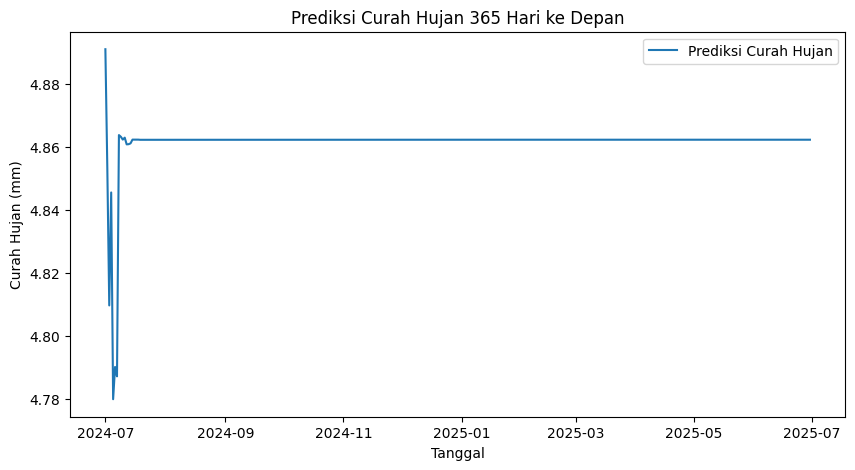

In [17]:
# Mencari parameter terbaik (berdasarkan MAPE terkecil)
best_result = results.loc[results['MAPE'].idxmin()]
hidden_neurons_best = int(best_result['Hidden Neurons'])  # Pastikan menjadi integer

# 4. Membuat Model ELM dengan parameter terbaik
elm = ELM(X.shape[1], 1)
elm.add_neurons(hidden_neurons_best, 'sigm')
elm.train(X, y)  # Latih model dengan seluruh dataset

# 5. Prediksi 365 hari ke depan
# Buat array untuk menyimpan prediksi
predictions = []
current_input = data_scaled[-7:].flatten()  # Mengambil data terakhir untuk prediksi

for _ in range(365):
    # Prediksi
    pred = elm.predict(current_input.reshape(1, -1))
    predictions.append(pred[0][0])
    
    # Update input dengan memasukkan prediksi terbaru
    current_input = np.roll(current_input, -1)  # Geser input
    current_input[-1] = pred  # Masukkan prediksi ke input

# 6. Balikkan normalisasi data
predictions_rescaled = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 7. Membuat DataFrame dari hasil prediksi
future_dates = pd.date_range(start=data['Tanggal'].max() + pd.Timedelta(days=1), periods=365)
predicted_df = pd.DataFrame({
    'Tanggal': future_dates,
    'Curah Hujan (RR) Prediksi': predictions_rescaled.flatten()
})

# 8. Mengelompokkan berdasarkan bulan untuk menentukan jadwal tanam padi
predicted_df['Bulan'] = predicted_df['Tanggal'].dt.month

# Dapatkan bulan dari tanggal terakhir pada dataset asli
last_month = data['Tanggal'].max().month

# Menggeser bulan sehingga dimulai dari bulan terakhir
predicted_df['Bulan'] = (predicted_df['Bulan'] + (last_month - 1)) % 12 + 1

# Tampilkan bulan terakhir
print(f"Bulan terakhir pada data: {last_month}")

monthly_summary = predicted_df.groupby('Bulan')['Curah Hujan (RR) Prediksi'].sum().reset_index()

# Tampilkan hasil ringkasan bulanan
print("Ringkasan Prediksi Bulanan:")
print(monthly_summary)

# 9. Visualisasi hasil prediksi
plt.figure(figsize=(10, 5))
plt.plot(predicted_df['Tanggal'], predicted_df['Curah Hujan (RR) Prediksi'], label="Prediksi Curah Hujan")
plt.title('Prediksi Curah Hujan 365 Hari ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.legend()
plt.show()

### Prediksi Curah Hujan Bulanan

Bulan terakhir pada data: 6


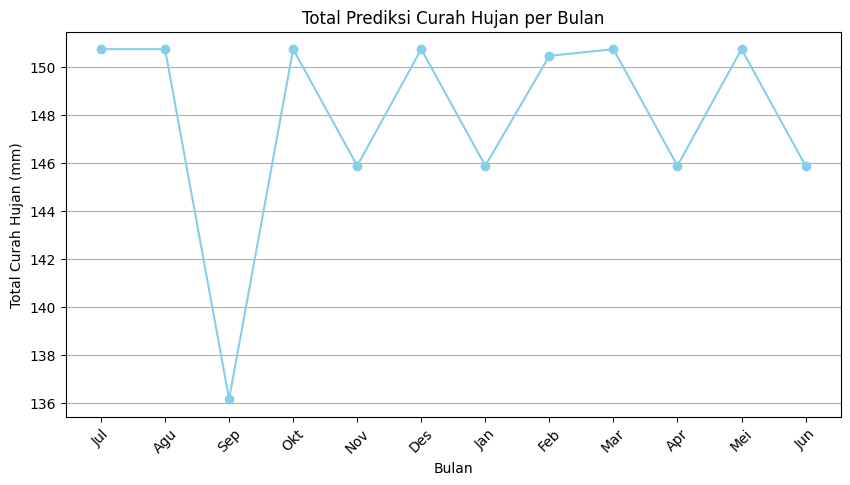

In [18]:
# Dapatkan bulan dari tanggal terakhir pada dataset asli
last_month = data['Tanggal'].max().month

# Menggeser bulan sehingga dimulai dari bulan terakhir + 1
predicted_df['Bulan'] = (predicted_df['Bulan'] + (last_month)) % 12 + 1

# Tampilkan bulan terakhir
print(f"Bulan terakhir pada data: {last_month}")

# 8. Mengelompokkan berdasarkan bulan untuk menentukan jadwal tanam padi
monthly_summary = predicted_df.groupby('Bulan')['Curah Hujan (RR) Prediksi'].sum().reset_index()

# 10. Visualisasi per bulan menggunakan grafik garis
plt.figure(figsize=(10, 5))
plt.plot(monthly_summary['Bulan'], monthly_summary['Curah Hujan (RR) Prediksi'], marker='o', color='skyblue', linestyle='-')
plt.title('Total Prediksi Curah Hujan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Curah Hujan (mm)')
plt.xticks(monthly_summary['Bulan'], ['Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des', 'Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun'], rotation=45)
plt.grid(axis='y')
plt.show()

## Deployment

https://app-perencanaan-jadwal-tanam-padi.streamlit.app/